# Load Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Path to the CSV file
file_path = "/Users/sjtok/ece684/suicidal_tweet_detection/Suicide_Detection.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [3]:
# Check the data types of all columns
print(df.dtypes)

Unnamed: 0     int64
text          object
class         object
dtype: object


In [4]:
df.head(10)

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
5,11,Honetly idkI dont know what im even doing here...,suicide
6,12,[Trigger warning] Excuse for self inflicted bu...,suicide
7,13,It ends tonight.I can’t do it anymore. \nI quit.,suicide
8,16,"Everyone wants to be ""edgy"" and it's making me...",non-suicide
9,18,My life is over at 20 years oldHello all. I am...,suicide


# Data Preprocessing

In [5]:
# Check missing values
df.isnull().sum()

Unnamed: 0    0
text          0
class         0
dtype: int64

In [6]:
# Drop rows with missing values
df = df.dropna(subset=['text'])

In [7]:
print(df['class'].unique())

['suicide' 'non-suicide']


In [8]:
# Remove trailing space from the 'class' column
df['class'] = df['class'].str.strip()

# Verify
print(df['class'].unique())

['suicide' 'non-suicide']


In [9]:
# Converting the class column to categorical type
df['class'] = df['class'].astype('category')

In [10]:
import re

In [11]:
# # Remove mentions (i.e. @username) and URLs

# def remove_mentions_urls(tweet):
#     tweet = re.sub(r'@\w+', '', tweet) # Remove mentions (e.g., @username)
#     tweet = re.sub(r'http[s]?://\S+', '', tweet) # Remove URLs starting with http:// or https://
#     return tweet

# df['text'] = df['text'].apply(remove_mentions_urls)

# print(df[['text']].head())

In [12]:
# Function to remove mentions(i.e. @username), URLs, and emojis
def remove_mentions_urls_emojis(tweet):
    # Remove mentions (e.g., @username)
    tweet = re.sub(r'@\w+', '', tweet)
    # Remove URLs starting with http:// or https://
    tweet = re.sub(r'http[s]?://\S+', '', tweet)
    # Remove emojis using the emoji regex pattern
    emoji_pattern = re.compile(
        "[\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        "\U0001F700-\U0001F77F"  # Alchemical Symbols
        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supplemental Symbols and Pictographs
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols
        "\U0001FA70-\U0001FAFF"  # Symbols for Legacy Computing
        "\U00002702-\U000027B0"  # Miscellaneous Symbols
        "\U000024C2-\U0001F251"  # Enclosed Characters
        "]+", re.UNICODE)
    tweet = re.sub(emoji_pattern, '', tweet)  # Remove emojis
    return tweet


df['text'] = df['text'].apply(remove_mentions_urls_emojis)
print(df[['text']].head())


                                                text
0  Ex Wife Threatening SuicideRecently I left my ...
1  Am I weird I don't get affected by compliments...
2  Finally 2020 is almost over... So I can never ...
3          i need helpjust help me im crying so hard
4  I’m so lostHello, my name is Adam (16) and I’v...


In [13]:
# Filter out rows where the tweet contains one word or less
one_word_or_less = df[df['text'].str.split().str.len() <= 1].shape[0]
print(f"Number of rows with 1 word or less: {one_word_or_less}")

df = df[df['text'].str.split().str.len() > 1]

Number of rows with 1 word or less: 82


# Exploratory Data Analysis

In [14]:
# Check class balance
class_counts = df['class'].value_counts()
print(class_counts)

class
non-suicide    116011
suicide        115981
Name: count, dtype: int64


In [15]:
# Check if data contains special characters

def contains_special_characters(tweet):
    # Regex pattern to match non-alphanumeric characters (special characters)
    pattern = re.compile('[^A-Za-z0-9\s]', re.UNICODE)
    return bool(pattern.search(tweet))  # Return True if special character is found, False otherwise

df['Contains_Special_Characters'] = df['text'].apply(contains_special_characters)
special_char_count = df['Contains_Special_Characters'].sum()

# Display the counts
print(f"Number of tweets containing special characters: {special_char_count}")

Number of tweets containing special characters: 218700


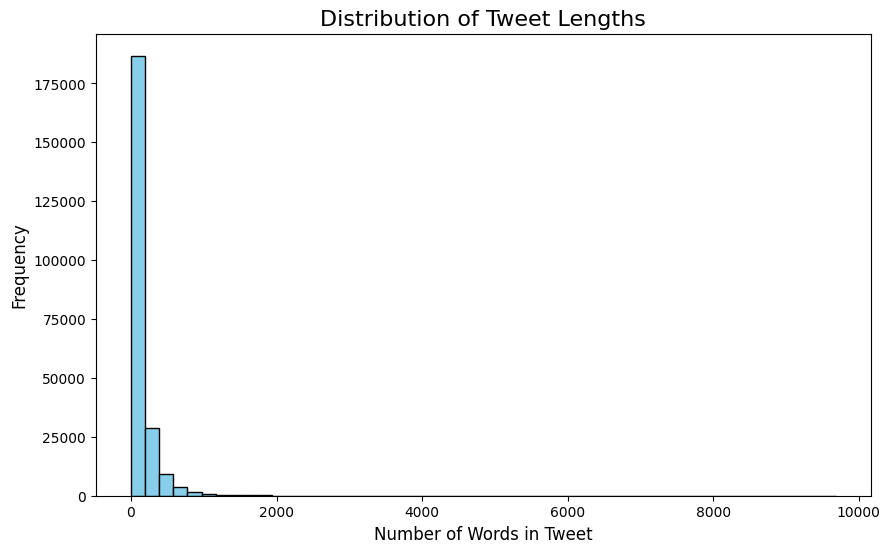

In [16]:
# Check distribution of tweet lengths
df['text'] = df['text'].astype(str)
df['Length'] = df['text'].apply(lambda x: len(x.split()))

# Draw histogram
plt.figure(figsize=(10, 6)) 
plt.hist(df['Length'], bins=50, edgecolor='black', color='skyblue')
plt.title('Distribution of Tweet Lengths', fontsize=16)
plt.xlabel('Number of Words in Tweet', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


In [17]:
from wordcloud import WordCloud

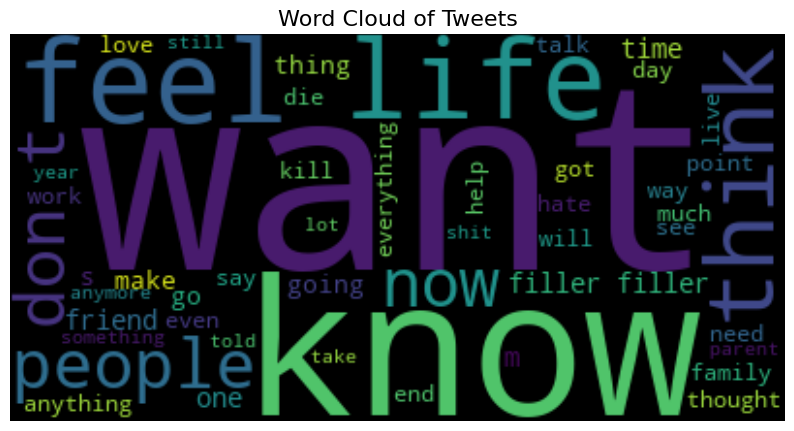

In [18]:
# Visualize Word Cloud of Tweets with top 50 words

from wordcloud import WordCloud
wordcloud = WordCloud(colormap='viridis',
                      background_color='black',
                      max_words=50
                      ).generate(' '.join(df['text']))


plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')  # Use bilinear interpolation for smoother display
plt.axis('off')
plt.title('Word Cloud of Tweets', fontsize=16)
plt.show()

In [19]:
import nltk
from nltk.corpus import stopwords

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/sjtok/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
# Quantify proportion of stop words in data

stop_words = set(stopwords.words('english'))
print(stop_words) # Check what words are considered stop words

def stopword_proportion(tweet):
    words = tweet.split()
    stopwords_in_tweet = [word for word in words if word.lower() in stop_words]
    return len(stopwords_in_tweet) / len(words) if len(words) > 0 else 0

df['Stopword_Proportion'] = df['text'].apply(stopword_proportion)

# Calculate the overall proportion of stopwords in the dataset
overall_stopword_proportion = df['Stopword_Proportion'].mean()

print(f"Overall proportion of stopwords in the dataset: {overall_stopword_proportion:.4f}")

{'no', 'above', 'can', "wouldn't", 'but', 'at', 'are', 'there', 'any', 'each', 'if', "won't", 'where', "couldn't", 'why', "that'll", 'will', 's', 'itself', 'further', 'out', 'once', 'by', 'so', 'shouldn', 'its', 'does', 'between', 'in', 'through', 'herself', 'up', 'yourselves', 'over', "don't", 'd', 'don', "needn't", 'myself', 'hasn', "shouldn't", "should've", "you've", 'of', 'your', 'or', 'what', 'our', 'nor', 'doesn', 'such', 'ours', 'because', 'both', 'me', 'that', 'm', 'shan', 'y', "haven't", 'do', 'then', 'into', 'for', 'with', 'they', 'was', "hasn't", 'yours', "isn't", 'hers', 'been', 'himself', 'as', 'yourself', 'whom', 'other', 'some', "wasn't", 'how', 'who', 'you', 'until', 'll', 'should', 'ain', 'this', 'he', "you'd", 'the', 'too', 'we', 'not', 'his', 'her', 'again', "mightn't", 'those', 'my', 'were', 'ma', "you're", 'theirs', 'all', 'before', 'having', 'it', 'after', "mustn't", 'doing', 'just', 'when', 'did', 'needn', 'won', 'now', 'be', 'and', 'them', 'couldn', 'mightn', 't

In [22]:
print(df.head())

   Unnamed: 0                                               text        class  \
0           2  Ex Wife Threatening SuicideRecently I left my ...      suicide   
1           3  Am I weird I don't get affected by compliments...  non-suicide   
2           4  Finally 2020 is almost over... So I can never ...  non-suicide   
3           8          i need helpjust help me im crying so hard      suicide   
4           9  I’m so lostHello, my name is Adam (16) and I’v...      suicide   

   Contains_Special_Characters  Length  Stopword_Proportion  
0                         True     143             0.545455  
1                         True      27             0.518519  
2                         True      26             0.423077  
3                        False       9             0.333333  
4                         True     438             0.442922  


In [23]:
from collections import Counter

In [24]:
# Separate the dataset by class
not_suicide_df = df[df['class'] == 'non-suicide']
potential_suicide_df = df[df['class'] == 'suicide']

In [25]:
# Check 20 most frequent words in each class

def tokenize_text(text):
    # Remove any non-alphanumeric characters (this can be adjusted)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text.lower())
    return text.split()

# Function to get the top 20 words for a class
def get_20_words_from_counter(dataframe):
    # Tokenize each tweet and flatten the list of tokens
    all_words = [word for tweet in dataframe['text'] for word in tokenize_text(tweet)]
    
    word_counts = Counter(all_words)
    return word_counts.most_common(20)

# Get the top 20 words for each class
not_suicide_top_words = get_20_words_from_counter(not_suicide_df)
potential_suicide_top_words = get_20_words_from_counter(potential_suicide_df)

print("Top 20 words for 'Not Suicide post':")
print(not_suicide_top_words)
print("\nTop 20 words for 'Potential Suicide post':")
print(potential_suicide_top_words)


Top 20 words for 'Not Suicide post':
[('i', 291024), ('and', 189501), ('to', 187282), ('the', 168560), ('a', 158538), ('my', 111225), ('it', 93007), ('of', 87871), ('you', 82809), ('me', 75667), ('is', 70387), ('that', 69908), ('in', 69635), ('im', 62756), ('for', 59960), ('but', 57925), ('so', 57412), ('filler', 54237), ('this', 53766), ('just', 53534)]

Top 20 words for 'Potential Suicide post':
[('i', 1445219), ('to', 848806), ('and', 705566), ('the', 513776), ('my', 505405), ('a', 463976), ('of', 346043), ('me', 339065), ('it', 301846), ('im', 278502), ('that', 271725), ('in', 249451), ('but', 228265), ('for', 217127), ('have', 215036), ('is', 207031), ('just', 203472), ('this', 183119), ('dont', 179556), ('was', 169221)]


In [26]:
# Check missing values
df.isnull().sum()

Unnamed: 0                     0
text                           0
class                          0
Contains_Special_Characters    0
Length                         0
Stopword_Proportion            0
dtype: int64

In [27]:
df = df.dropna()
df.head()

,Unnamed: 0,text,class,Contains_Special_Characters,Length,Stopword_Proportion
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,True,143,0.545455
1,3,Am I weird I don't get affected by compliments...,non-suicide,True,27,0.518519
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,True,26,0.423077
3,8,i need helpjust help me im crying so hard,suicide,False,9,0.333333
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,True,438,0.442922


# Export CSV

In [28]:
df.to_csv('tweets_preprocessed.csv', index=False)